I'm trying to learn some more Python and EDA, my source for this code is a [YouTube video](https://www.youtube.com/watch?v=eMOA1pPVUc4) from [Keith Galli](https://github.com/KeithGalli/Pandas-Data-Science-Tasks).

## Importing Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.reset_defaults()

%matplotlib inline

Our `Sales_Data` is spread across 12 different csv files, so we'll first need to merge it all into a single file.

In [2]:
# Another possible way of doing it
#files=[f for f in os.listdir("./") if f.endswith('.csv')]
#df=pd.concat(pd.read_csv(i) for i in files)

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv("all_data.csv") # Concatenated dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data !

#### Drop rows with NaN

In [4]:
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_data = all_data.dropna(how='all')

### Augment data with additional columns

#### Add Month Column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


But there is a problem, there a few rows in our dataframe such that the values in the column `Order Date` are `'Order Date'`, in these cases our `Month` column will have value `'Or'`. To fix that, let's check which rows have this issue.

In [7]:
all_data[all_data['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Now we'll convert the values in the `Month` column to integers.

In [9]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Month'].dtypes

dtype('int32')

#### Convert numerical rows to int32 type

It seems that some columns that are supposed to have numerical values are actually storing `'object'` types, which usually refers to characters.

In [10]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [11]:
# Converting 'Quantity Ordered' column to integer
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

# Converting 'Price Each' column to float
all_data['Price Each'] = all_data['Price Each'].astype('float32')

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float32
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#### Add Sales Column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
#### Add Sales Column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


#### Add City Column

In [13]:
# Let's use apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),TX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),CA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),CA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),CA


### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
grouped_month = all_data.groupby(['Month']).sum()
grouped_month.sort_values(['Sales'], ascending=False).head(1)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.5,4.613443e+06


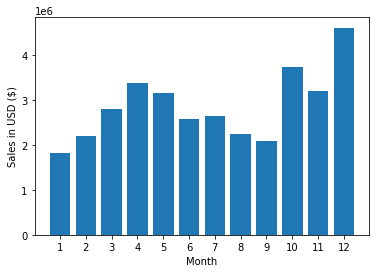

In [15]:
months = range(1,13)

plt.bar(months, grouped_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

### Question 2: What city had de highest number of sales?

In [16]:
grouped_city = all_data.groupby(['City']).sum()
grouped_city.sort_values(['Sales'], ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.500,315520,8.262204e+06
Los Angeles (CA),33289,5421435.000,208325,5.452571e+06
New York City (NY),27932,4635371.000,175741,4.664317e+06
Boston (MA),22528,3637409.750,141112,3.661642e+06
Atlanta (GA),16602,2779908.250,104794,2.795499e+06
Dallas (TX),16730,2752627.750,104620,2.767975e+06
Seattle (WA),16553,2733296.000,104941,2.747755e+06
Portland (OR),11303,1860558.250,70621,1.870732e+06
Austin (TX),11153,1809873.625,69829,1.819582e+06


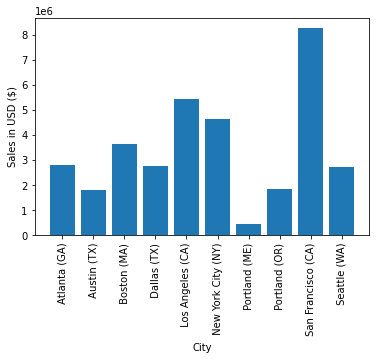

In [17]:
city = all_data['City'].unique()

cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities, grouped_city['Sales'])
plt.xticks(city)
plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),MA,22,30,1
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),CA,14,38,1
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),CA,14,38,1
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),CA,9,27,1


In [20]:
all_data.groupby(['Hour',]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Minute,Count
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


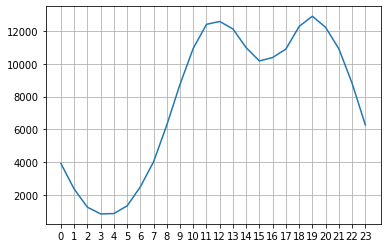

In [21]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is to announce around 12pm or 19pm

### Question 4: What products are most often sold together?

In [22]:
same_order = all_data[all_data['Order ID'].duplicated(keep=False)]

same_order['Grouped'] = same_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

same_order = same_order[['Order ID', 'Grouped']].drop_duplicates()

same_order.head()

C:\Users\nicol\AppData\Local\Temp\ipykernel_3752\1519553577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_order['Grouped'] = same_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in same_order['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

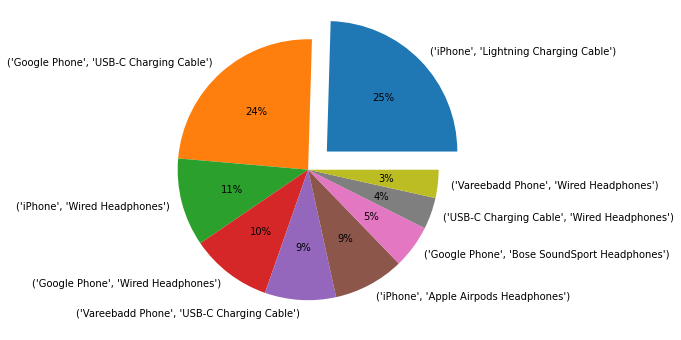

In [24]:
key_list = []

for key in range(0,9):
    key_list.append(count.most_common(10)[key][1])

labels_list = []

for label in range(0,9):
    labels_list.append(count.most_common(10)[label][0])

explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]
    
fig = plt.figure(figsize=(9, 6))
plt.pie(key_list, labels=labels_list, explode=explode, autopct='%1.0f%%')
plt.show()

### What product sold the most? Why do you think it sold the most?

In [25]:
grouped_product = all_data.groupby(['Product'])
most_sold = grouped_product[['Product', 'Quantity Ordered']].sum().sort_values(['Quantity Ordered'], ascending=False)
most_sold

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


In [26]:
most_sold.head(1)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017


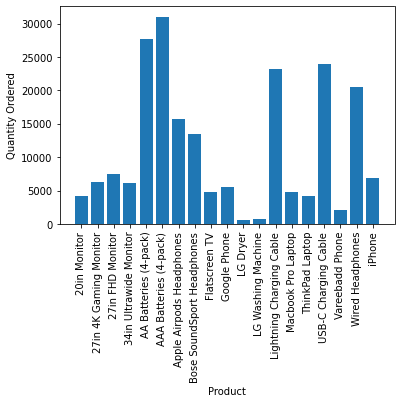

In [27]:
products = [product for product, df in grouped_product]
quantity_ordered = grouped_product.sum()['Quantity Ordered']

plt.bar(products, quantity_ordered)
plt.xticks(rotation=90)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

It looks like **Batteries** were sold the most, and then after that we have **Charging Cables** being sold a lot aswell. The reason for that might be because these are cheap products compared to the rest and they might not be very durable.

C:\Users\nicol\AppData\Local\Temp\ipykernel_3752\431962365.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color='#ED820E')
C:\Users\nicol\AppData\Local\Temp\ipykernel_3752\431962365.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


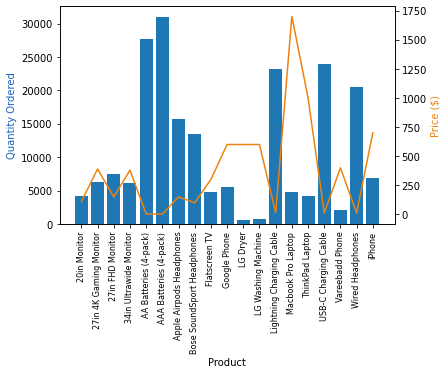

In [47]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-', color='#ED820E')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='#1560BD')
ax1.set_xticklabels(products, rotation='vertical', size=8)

ax2.set_ylabel('Price ($)', color='#ED820E')

plt.show()

Note that, for low prices the quantity ordered is high and, similarly, when prices are high, the quantity ordered is low.